In [0]:
import pandas as pd
import numpy as np

import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#1. Import and store the data in a data frame.
cust_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Project4_SL/Bank_Personal_Loan_Modelling-1.csv") 

In [4]:
cust_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
cust_df.eq(np.nan).any()

ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

In [6]:
cust_df.eq(0).any()

ID                    False
Age                   False
Experience             True
Income                False
ZIP Code              False
Family                False
CCAvg                  True
Education             False
Mortgage               True
Personal Loan          True
Securities Account     True
CD Account             True
Online                 True
CreditCard             True
dtype: bool

In [7]:
cust_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


# Study the data distribution in each attribute, share your findings.

In [0]:
cust_df.drop("ZIP Code", axis=1, inplace=True)
cust_df.drop("ID", axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


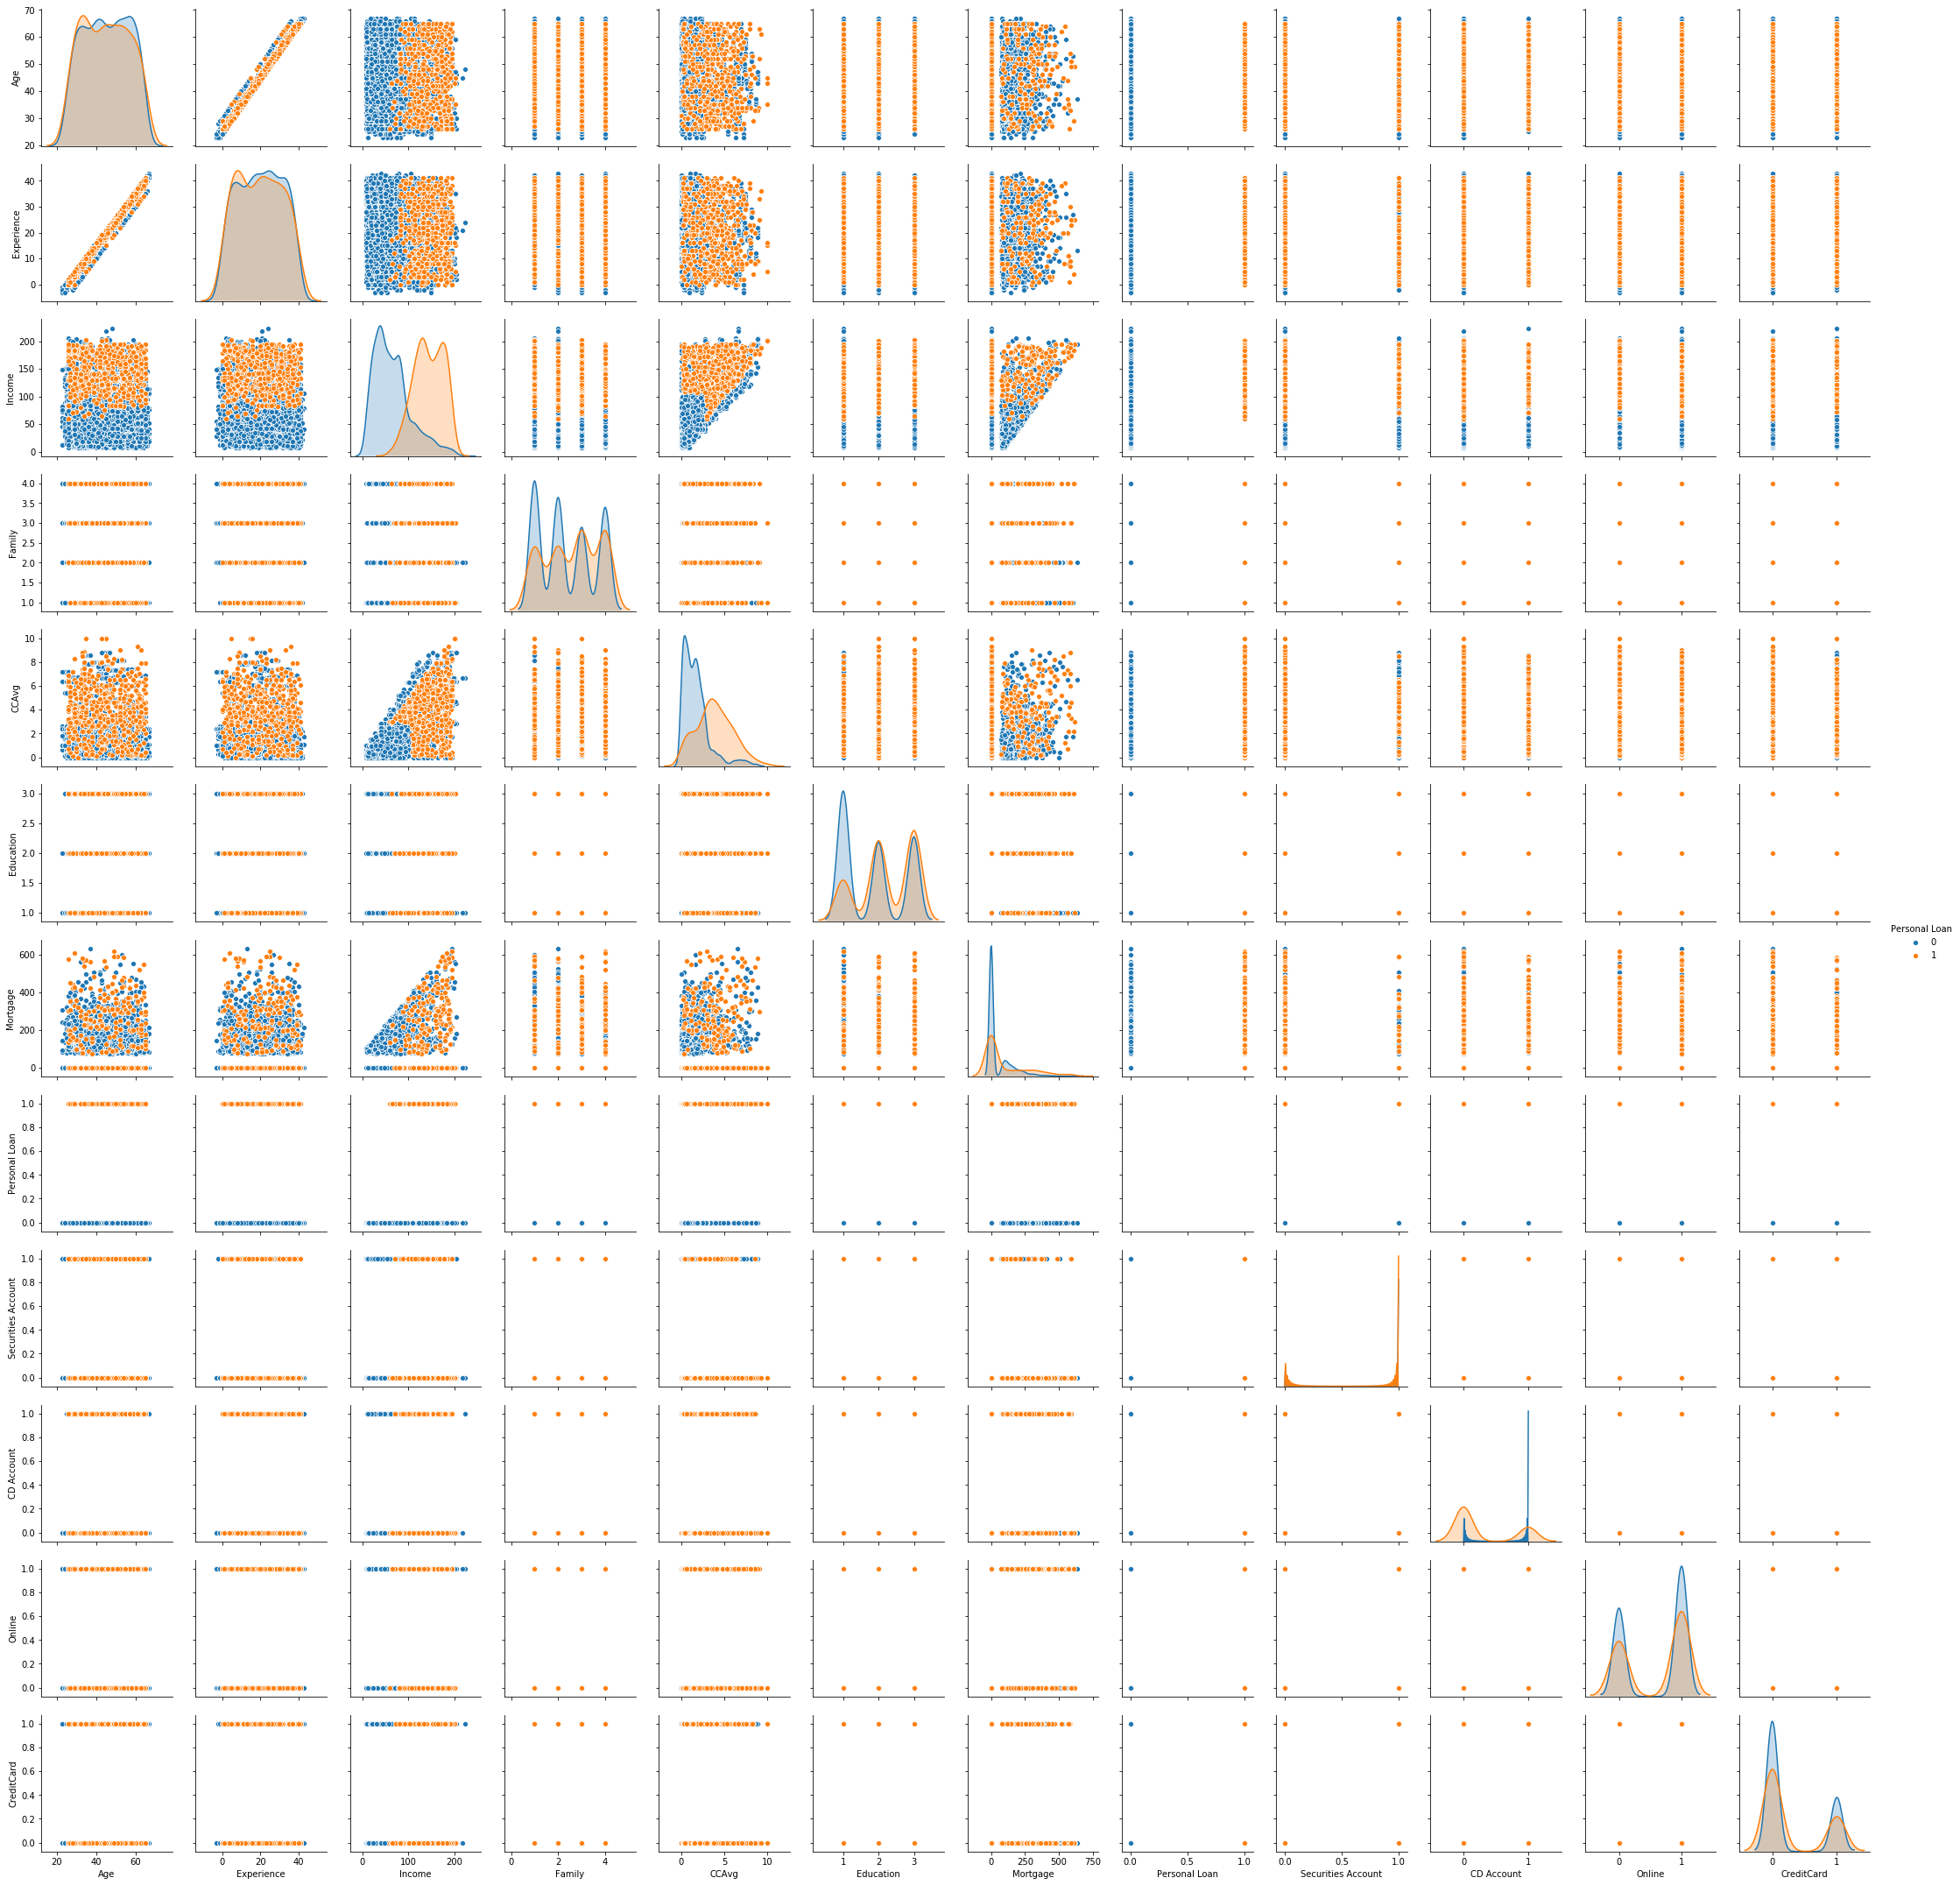

In [9]:
sns.pairplot(cust_df, hue="Personal Loan")

# Study the data distribution in each attribute, share your findings.

**Below are the Findings**
1. ID and ZIP Code column are not relevant and can be removed from the data. The above pair plot have those columns already dropped.
2. Younger age group customers are slightly more interested in personal loan than of the older age customers.
3. Fairly less experienced customers are more interested in personal loan than of the higher perfessional experience
4. Higher income group customers are more likely to opt for personal loan
5. Customers with lower family members are more interested for personal loan
6. Customers having higher Credit card usage are more likely to avail for personal loan, as this seems that are more credit hungry
7. Customers with higher education are more likely to avail personal loan
8. Customer who don't have certificate of deposit (CD) account in the bank are more likely to take personal loan, which is very obvious as if customer is already having deposits available, so why they will opt for personal loan 

# Get the target column distribution. Your comments

**1. Target column distribution has been seen in the pair plot and the above findings are on that basis itself.**



In [10]:
cust_df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

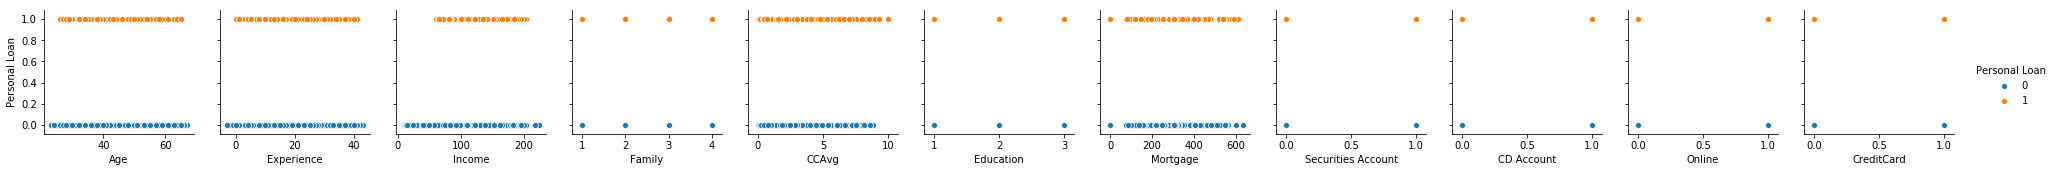

In [11]:
sns.pairplot(cust_df, y_vars=['Personal Loan'], x_vars=['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'], hue="Personal Loan")

In [12]:
cust_df.corr()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994215,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994215,1.000000,-0.046574,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.055269,-0.046574,1.000000,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.052563,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.050077,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013152,-0.187524,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010582,0.206806,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.007413,0.502462,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.001232,-0.002616,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.010353,0.169738,0.014110,0.136534,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


**2. Income, CC Avg and CD Account are the major factors of driving the likelyhood of a customer will opt for personal loan or not.**

# Split the data into training and test set in the ratio of 70:30 respectively

In [0]:
X = cust_df.drop('Personal Loan', axis=1)

y = cust_df[['Personal Loan']]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=51)

# Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans

**1. Logistic Regression**

In [15]:
model1=LogisticRegression(penalty='l2', max_iter=1000)
model1.fit(X_train, y_train)
prediction1=model1.predict(X_test)
from sklearn.metrics import accuracy_score
m1Score=accuracy_score(y_test, prediction1)
print("Model 1: Linear Regression accuracy score is: ", m1Score*100,"%")

Model 1: Linear Regression accuracy score is:  94.6 %


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**2. KNN**

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [53]:
NNH = KNeighborsClassifier(n_neighbors = 21, weights = 'uniform', 
                           metric = 'euclidean')
NNH.fit(X_train, y_train)
prediction2 = NNH.predict(X_test)
from sklearn.metrics import roc_auc_score
auc2 = roc_auc_score(y_test,prediction2)
print("Model 2: KNN accuracy score is: ", auc2*100,"%")

Model 2: KNN accuracy score is:  63.09297912713473 %


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


**3. Naïve Bayes**

In [28]:
from sklearn.naive_bayes import GaussianNB

clf_GNB = GaussianNB(priors=None)
clf_GNB = clf_GNB.fit(X_train, y_train)
prediction3=clf_GNB.predict(X_test)
auc3=accuracy_score(y_test, prediction3)
print("Model 3: Naive Bayes accuracy score is: ", auc3*100,"%")

Model 3: Naive Bayes accuracy score is:  87.06666666666666 %


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Print the confusion matrix for all the above models

**1. Logistic Regression**

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix1 = confusion_matrix(y_test, prediction1)
print(confusion_matrix1)

[[1340   24]
 [  57   79]]


**2. KNN**

In [54]:
confusion_matrix2 = confusion_matrix(y_test, prediction2)
print(confusion_matrix2)

[[1320   44]
 [  96   40]]


**3. Naïve Bayes**

In [55]:
confusion_matrix3 = confusion_matrix(y_test, prediction3)
print(confusion_matrix3)

[[1235  129]
 [  65   71]]


# Give your reasoning on which is the best model in this case and why it performs better?

The best suited model based on accuracy score is Logistic regression.

Also by looking at the confusion matrix below are the factors which showcase the reason for better performance:

1.   True postive predictions are highest in Logistic regression
2.   False positive and False negative is least in Logistic regression

Considering the Accuracy Score and Confusion matrix, **Logistic Regression seems to be the best model for this data set**.

